In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import csv
import numpy as np


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import os

import scores


# Reading in the Data

In [2]:
path_f=os.getcwd()

path_f_1=os.path.join(path_f, 'data')


names=[]
for files_txts in os.listdir(path_f_1):
    if files_txts.endswith(".csv"):
        #print(files_txts)
        names.append(files_txts)
        
path_train=os.path.join(path_f_1, names[0])
path_test=os.path.join(path_f_1, names[1])

df_train=pd.read_csv(path_train)
df_train.shape

(2572, 99)

# Data Manipulation

In [3]:
#Transforming the outcome to a numpy vector
stab_vector=df_train['stabilityVec'].values
y=[]
for x in stab_vector:
    #print(x)
    a=np.fromstring(x[1:-1],sep=',').astype(int)
    y.append(a)
y=np.array(y) 

df_tmp = pd.DataFrame(y, columns = ['A', 'A91B', 'A82B','A73B','A64B','A55B','A46B','A37B','A28B','A19B','B'])
stab_vec_list=[ 'A91B', 'A82B','A73B','A64B','A55B','A46B','A37B','A28B','A19B']

df_train=df_train.drop("stabilityVec",axis=1) #removing the results which originally are a string
feature_cols=list(df_train)
df_train.shape

(2572, 98)

In [4]:
#Transforming the Formulas to integers
csvfile = csv.reader(open(path_train,'r'))
header = next(csvfile)

formulaA = []
formulaB = []

for row in csvfile:
    formulaA.append(row[0])
    formulaB.append(row[1])
formulas = formulaA + formulaB
formulas = list(set(formulas))

# -- /!\ need to save the dict as the ordering may difer at each run
formula2int = {}
int2formula = {}
for i, f in enumerate(formulas):
    formula2int[f] = i
    int2formula[i] = f

formulaAint = np.array([formula2int[x] for x in formulaA])
formulaBint = np.array([formula2int[x] for x in formulaB])

df_train['formulaA']=formulaAint
df_train['formulaB']=formulaBint

df_train=pd.concat([df_train, df_tmp],axis=1)
df_train.shape

(2572, 109)

# Input and Output of the Model

Analyzing the output first

0    1344
1     482
2     369
3     259
4      96
5      20
6       2
dtype: int64


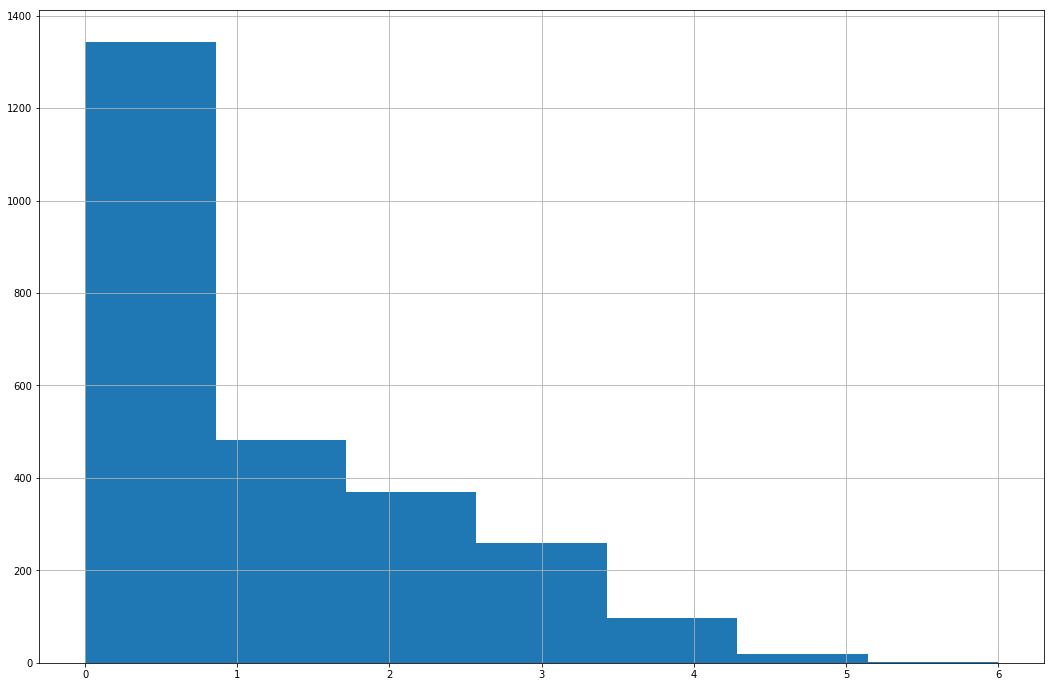

In [5]:
# Observing How many pair produce at least one stable compound
y = df_train[stab_vec_list]
print(y.sum(axis=1).value_counts())
y.sum(axis=1).hist(bins=7, figsize=(18, 12), xlabelsize=10)


0    2522
1      50
Name: A91B, dtype: int64
0    1332
1      50
Name: A91B, dtype: int64
0    580
1     50
Name: A91B, dtype: int64
0    2484
1      88
Name: A82B, dtype: int64
0    1702
1      88
Name: A82B, dtype: int64
0    813
1     88
Name: A82B, dtype: int64
0    1974
1     598
Name: A73B, dtype: int64
0    1951
1     598
Name: A73B, dtype: int64
0    626
1    598
Name: A73B, dtype: int64
0    2396
1     176
Name: A64B, dtype: int64
0    2178
1     176
Name: A64B, dtype: int64
0    1002
1     176
Name: A64B, dtype: int64
0    1988
1     584
Name: A55B, dtype: int64
0    1961
1     584
Name: A55B, dtype: int64
0    644
1    584
Name: A55B, dtype: int64
0    2387
1     185
Name: A46B, dtype: int64
0    2158
1     185
Name: A46B, dtype: int64
0    990
1    185
Name: A46B, dtype: int64
0    2212
1     360
Name: A37B, dtype: int64
0    2141
1     360
Name: A37B, dtype: int64
0    863
1    360
Name: A37B, dtype: int64
0    2180
1     392
Name: A28B, dtype: int64
0    2119
1     392
Na

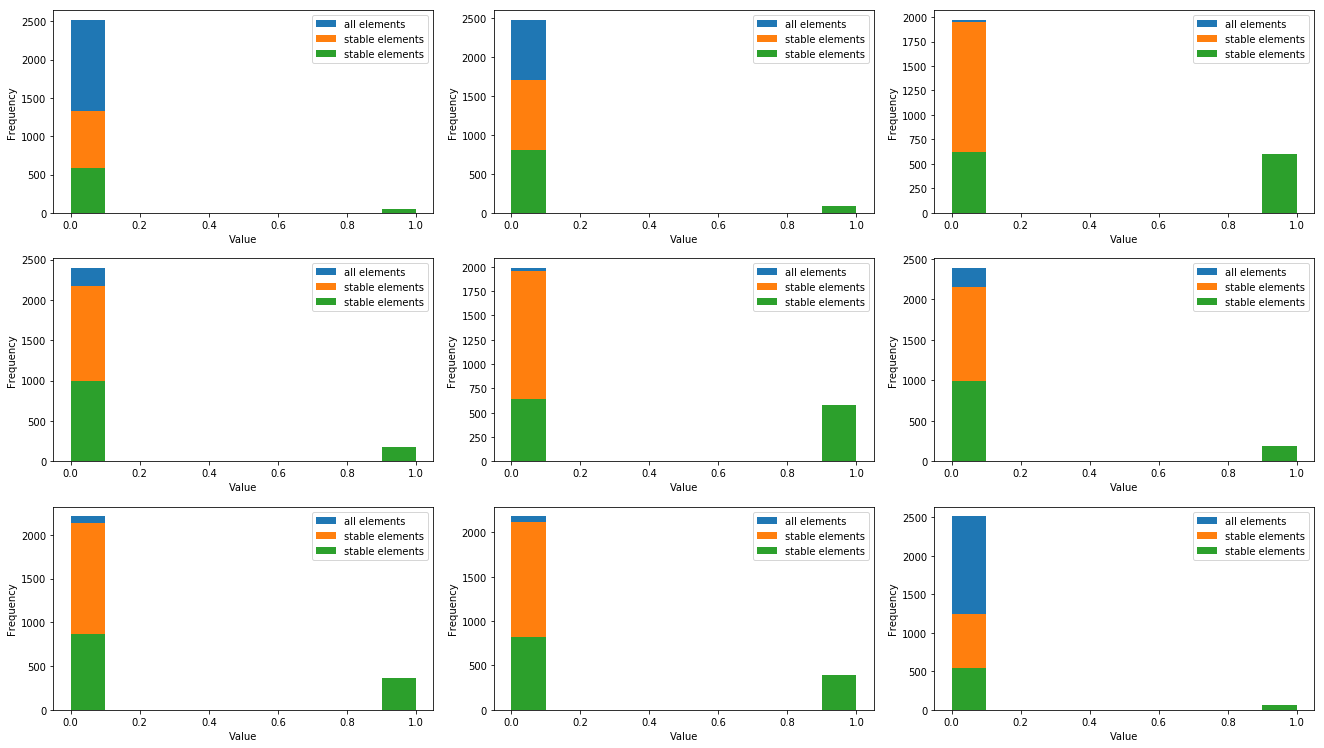

In [6]:
## Observing how many element pairs produce a stable compound per % and overall
f,a = plt.subplots(3,3)
f.subplots_adjust(hspace=0.4, wspace=0.4)
a = a.ravel()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

y_all=df_train[stab_vec_list]

for count,ax in enumerate(a):
    
    y = df_train[stab_vec_list[count]]
    print(y.value_counts())
    hist_1, bin_edges_1 = np.histogram(y)
    freq_1=hist_1/y.size
    
    ax.hist(y.values, bins=10, label='all elements')


    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    

#for count in range(9):

    #y = df_train[stab_vec_list[count]]
    stable_comp=df_train.loc[y==1,['formulaA','formulaB']]
    #print('Compound being analyzed is',stab_vec_list[count])
    stable_comp_num=stable_comp.values
    stable_A=np.unique(stable_comp_num[:,0])
    stable_B=np.unique(stable_comp_num[:,1])
    df_unique= pd.DataFrame()
    #print(df_unique.shape)

    y_unique= pd.DataFrame()
    
    for cnt in range(stable_A.shape[0]):
        #print(stable_A[cnt])
        df_tmp=y.loc[df_train['formulaA']==stable_A[cnt]]
        y_unique=pd.concat([y_unique, df_tmp],axis=0)
        #print(df_tmp.shape)
        #print(df_unique.shape)
    
    #print(y_unique.shape)

    for cnt in range(stable_B.shape[0]):
        #print(stable_A[cnt])
        df_tmp=y.loc[df_train['formulaB']==stable_B[cnt]]
        y_unique=pd.concat([y_unique, df_tmp],axis=0)

    
    y_unique=y.iloc[y_unique.index.unique()]
    ax.hist(y_unique.values, bins=10, label='stable elements')
    print(y_unique.value_counts())

    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title()
    #print(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    
    y_stable=y_unique.loc[np.logical_not(y_all.sum(axis=1)==0)]
    ax.hist(y_stable.values, bins=10, label='stable elements')
    print(y_stable.value_counts())

    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title()
    #print(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    ax.legend(loc='upper right')
    
    
    ax.legend(loc='upper right')

    


plt.tight_layout()

## Building model to determine if the elements will produce at least one stable compound

In [7]:

print(y_all.sum(axis=1).value_counts())

print('These are example of elements that produce no stable compounds')

(df_train.loc[y_all.sum(axis=1)==0].head())

0    1344
1     482
2     369
3     259
4      96
5      20
6       2
dtype: int64
These are example of elements that produce no stable compounds


,formulaA,formulaB,formulaA_elements_AtomicVolume,formulaB_elements_AtomicVolume,formulaA_elements_AtomicWeight,formulaB_elements_AtomicWeight,formulaA_elements_BoilingT,formulaB_elements_BoilingT,formulaA_elements_BulkModulus,formulaB_elements_BulkModulus,...,A91B,A82B,A73B,A64B,A55B,A46B,A37B,A28B,A19B,B
2,39,7,37.433086,21.723966,227.0,74.9216,3473.0,887.0,0.0,22.0,...,0,0,0,0,0,0,0,0,0,1
3,39,49,37.433086,64.969282,227.0,137.3270,3473.0,2143.0,0.0,9.6,...,0,0,0,0,0,0,0,0,0,1
4,39,44,37.433086,35.483459,227.0,208.9804,3473.0,1837.0,0.0,31.0,...,0,0,0,0,0,0,0,0,0,1
6,39,42,37.433086,8.825090,227.0,12.0107,3473.0,4300.0,0.0,33.0,...,0,0,0,0,0,0,0,0,0,1
7,39,19,37.433086,42.937187,227.0,40.0780,3473.0,1757.0,0.0,17.0,...,0,0,0,0,0,0,0,0,0,1


0    2522
1      50
Name: A91B, dtype: int64
0    1178
1      50
Name: A91B, dtype: int64
0    2484
1      88
Name: A82B, dtype: int64
0    1140
1      88
Name: A82B, dtype: int64
0    1974
1     598
Name: A73B, dtype: int64
0    630
1    598
Name: A73B, dtype: int64
0    2396
1     176
Name: A64B, dtype: int64
0    1052
1     176
Name: A64B, dtype: int64
0    1988
1     584
Name: A55B, dtype: int64
0    644
1    584
Name: A55B, dtype: int64
0    2387
1     185
Name: A46B, dtype: int64
0    1043
1     185
Name: A46B, dtype: int64
0    2212
1     360
Name: A37B, dtype: int64
0    868
1    360
Name: A37B, dtype: int64
0    2180
1     392
Name: A28B, dtype: int64
0    836
1    392
Name: A28B, dtype: int64
0    2512
1      60
Name: A19B, dtype: int64
0    1168
1      60
Name: A19B, dtype: int64


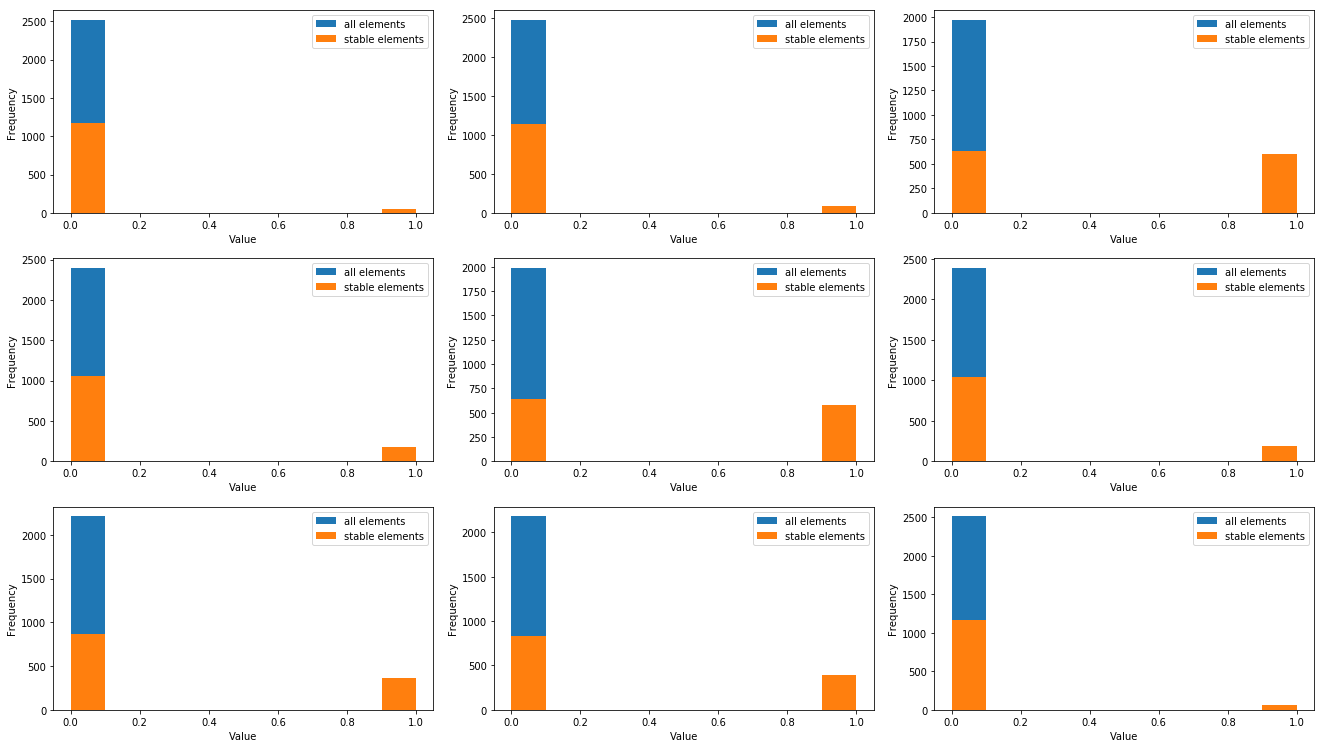

In [8]:
f,a = plt.subplots(3,3)
f.subplots_adjust(hspace=0.4, wspace=0.4)
a = a.ravel()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

y_all=df_train[stab_vec_list]

for count,ax in enumerate(a):
    
    y = df_train[stab_vec_list[count]]
    print(y.value_counts())
    hist_1, bin_edges_1 = np.histogram(y)
    freq_1=hist_1/y.size
    
    ax.hist(y.values, bins=10, label='all elements')


    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    

#for count in range(9):

    y = df_train[stab_vec_list[count]]
    stable_comp=df_train.loc[y==1,['formulaA','formulaB']]
    #print('Compound being analyzed is',stab_vec_list[count])
    stable_comp_num=stable_comp.values
    stable_A=np.unique(stable_comp_num[:,0])
    stable_B=np.unique(stable_comp_num[:,1])
    df_unique= pd.DataFrame()
    #print(df_unique.shape)

   
    y_stable=y.loc[np.logical_not(y_all.sum(axis=1)==0)]
    ax.hist(y_stable.values, bins=10, label='stable elements')
    print(y_stable.value_counts())

    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title()
    #print(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    ax.legend(loc='upper right')

    




plt.tight_layout()

### PCA Visualization

In [9]:
X = df_train[feature_cols]

from sklearn.preprocessing import normalize

X_norm = normalize(X, axis=1)



from scipy.stats import zscore

X_norm_zscore=X.apply(zscore)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_norm_0_1=min_max_scaler.fit_transform(X)


top 10 explained variance:  [0.09584011 0.08452767 0.05184498 0.04871556 0.03646006 0.01696572
 0.01548123 0.0090672  0.00633605 0.00195538]


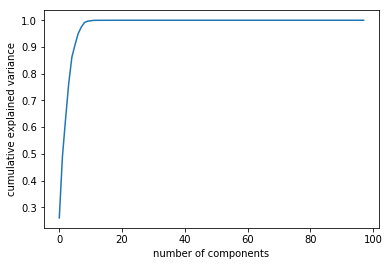

In [10]:
#Visualiziting the input using PCA
pca = PCA()

pca.fit(X_norm)

explained_var = pca.explained_variance_
print('top 10 explained variance: ', explained_var[:10])

#pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

components = pca.components_[:20,:]



(2572, 20)


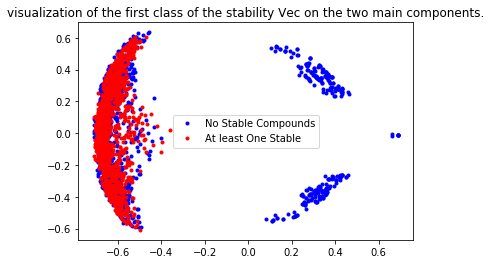

In [11]:
new_data = np.dot(X_norm, components.T)
print(new_data.shape)

indexes_0 = y_all.sum(axis=1)==0
indexes_1=np.logical_not(indexes_0)
plt.plot(new_data[indexes_0,0], new_data[indexes_0,1], 'b.', linestyle='', label='No Stable Compounds')
plt.plot(new_data[indexes_1,0], new_data[indexes_1,1], 'r.', linestyle='', label='At least One Stable ')
plt.title('visualization of the first class of the stability Vec on the two main components.')
plt.legend()

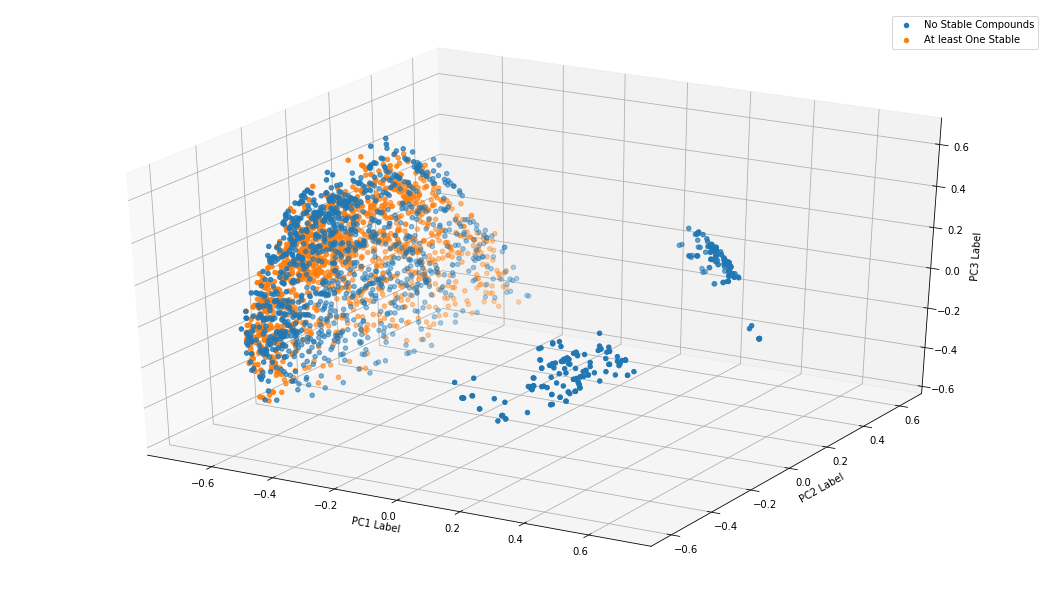

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111, projection='3d')



ax.scatter(new_data[indexes_0,0], new_data[indexes_0,1], new_data[indexes_0,2], label='No Stable Compounds')
ax.scatter(new_data[indexes_1,0], new_data[indexes_1,1], new_data[indexes_1,2], label='At least One Stable ')

ax.set_xlabel('PC1 Label')
ax.set_ylabel('PC2 Label')
ax.set_zlabel('PC3 Label')
ax.legend()
plt.show()

In [13]:
## Extending the data series to encompass the information to determine if the elements procure a stable compund or not
df_train.head()

,formulaA,formulaB,formulaA_elements_AtomicVolume,formulaB_elements_AtomicVolume,formulaA_elements_AtomicWeight,formulaB_elements_AtomicWeight,formulaA_elements_BoilingT,formulaB_elements_BoilingT,formulaA_elements_BulkModulus,formulaB_elements_BulkModulus,...,A91B,A82B,A73B,A64B,A55B,A46B,A37B,A28B,A19B,B
0,39,64,37.433086,17.075648,227.0,107.868200,3473.0,2435.0,0.0,100.0,...,0,0,1,0,1,0,0,0,0,1
1,39,55,37.433086,16.594425,227.0,26.981539,3473.0,2792.0,0.0,76.0,...,0,0,1,0,0,0,0,0,0,1
2,39,7,37.433086,21.723966,227.0,74.921600,3473.0,887.0,0.0,22.0,...,0,0,0,0,0,0,0,0,0,1
3,39,49,37.433086,64.969282,227.0,137.327000,3473.0,2143.0,0.0,9.6,...,0,0,0,0,0,0,0,0,0,1
4,39,44,37.433086,35.483459,227.0,208.980400,3473.0,1837.0,0.0,31.0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
df_tmp_stable = pd.DataFrame( columns = ['Stable_compunds'])
df_tmp_stable['Stable_compunds']=np.logical_not(y_all.sum(axis=1)==0).astype(int) ## A one means it has a stable value  a 0 
print(df_tmp_stable['Stable_compunds'].value_counts())
df_tmp_stable.head()

0    1344
1    1228
Name: Stable_compunds, dtype: int64


,Stable_compunds
0,1
1,1
2,0
3,0
4,0


In [15]:
df_train=pd.concat([df_train, df_tmp_stable],axis=1)
df_train.head()

,formulaA,formulaB,formulaA_elements_AtomicVolume,formulaB_elements_AtomicVolume,formulaA_elements_AtomicWeight,formulaB_elements_AtomicWeight,formulaA_elements_BoilingT,formulaB_elements_BoilingT,formulaA_elements_BulkModulus,formulaB_elements_BulkModulus,...,A82B,A73B,A64B,A55B,A46B,A37B,A28B,A19B,B,Stable_compunds
0,39,64,37.433086,17.075648,227.0,107.868200,3473.0,2435.0,0.0,100.0,...,0,1,0,1,0,0,0,0,1,1
1,39,55,37.433086,16.594425,227.0,26.981539,3473.0,2792.0,0.0,76.0,...,0,1,0,0,0,0,0,0,1,1
2,39,7,37.433086,21.723966,227.0,74.921600,3473.0,887.0,0.0,22.0,...,0,0,0,0,0,0,0,0,1,0
3,39,49,37.433086,64.969282,227.0,137.327000,3473.0,2143.0,0.0,9.6,...,0,0,0,0,0,0,0,0,1,0
4,39,44,37.433086,35.483459,227.0,208.980400,3473.0,1837.0,0.0,31.0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
## Using Un-normalized data as input
X_train_new=df_train[feature_cols]



y_new=df_tmp_stable['Stable_compunds']


print(X_train_new.shape)
print(y_new.shape)

(2572, 98)
(2572,)


In [17]:
# Using PCA as input
X_train_new=new_data

y_new=df_tmp_stable['Stable_compunds']

print(X_train_new.shape)
print(y_new.shape)

(2572, 20)
(2572,)


In [18]:
# Normalizing such that the magnitude is one
X_train_new=X_norm # vector magnitude is one
y_new=df_tmp_stable['Stable_compunds']

print(X_train_new.shape)
print(y_new.shape)


(2572, 98)
(2572,)


In [19]:
## Normalizing by Zscore
from scipy.stats import zscore
X_train_new=df_train[feature_cols]
X_train_new=X_train_new.apply(zscore)
y_new=df_tmp_stable['Stable_compunds']

print(X_train_new.shape)
print(y_new.shape)

#X_train_new.mean()
#X_train_new.std()

#X_train_new.max()

(2572, 98)
(2572,)


In [36]:
## Normalizing by Zscore and then 0-1
from scipy.stats import zscore
X_train_new=df_train[feature_cols]
X_train_new=X_train_new.apply(zscore)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()



#print(type(X_train_new))

X_train_new=min_max_scaler.fit_transform(X_train_new)


y_new=df_tmp_stable['Stable_compunds']

print(X_train_new.shape)
print(y_new.shape)

#X_train_new.mean()
#X_train_new.std()

#np.max(X_train_new,axis=1)

(2572, 98)
(2572,)


In [21]:
## Normalizing so that range is 0-1

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()


X_train_new=df_train[feature_cols]
#print(type(X_train_new))

X_train_new=min_max_scaler.fit_transform(X_train_new)

#print(type(X_train_new))

y_new=df_tmp_stable['Stable_compunds']

print(X_train_new.shape)
print(y_new.shape)

#X_train_new.mean()
#X_train_new.std()


(2572, 98)
(2572,)


In [22]:
## Normalizing so that range is -1 to 1

from sklearn import preprocessing


max_abs_scaler = preprocessing.MaxAbsScaler()


X_train_new=df_train[feature_cols]
#print(type(X_train_new))

X_train_new=max_abs_scaler.fit_transform(X_train_new)

#print(type(X_train_new))

y_new=df_tmp_stable['Stable_compunds']

print(X_train_new.shape)
print(y_new.shape)

#X_train_new.mean()
#X_train_new.std()

#np.mean(X_train_new,axis=1)

(2572, 98)
(2572,)


In [23]:
## test-train split
X_train, X_test, y_train, y_test = train_test_split(X_train_new, y_new,
                                                    test_size=0.33,
                                                    shuffle=True,
                                                    random_state=42)



In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [25]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()
# fit model
logreg.fit(X_train, y_train)
#Make prediction using fitted model
y_pred = logreg.predict(X_test)


accuracy = np.mean((y_test == y_pred))

precision = metrics.precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
F1 = f1_score(y_test, y_pred, average='binary')

print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)


#Confusion Metric
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('accuracy score',(TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('classification error', classification_error)
#print(1 - metrics.accuracy_score(y_test, y_pred_class))

sensitivity = TP / float(FN + TP)

print('sensitivity',sensitivity)


specificity = TN / (TN + FP)

print('specificity',specificity)

false_positive_rate = FP / float(TN + FP)

print('false positive rate',false_positive_rate)
#print(1 - specificity)

precision = TP / float(TP + FP)

print('precision',precision)
print(metrics.precision_score(y_test, y_pred))

precision:  0.751219512195122   recall:  0.7738693467336684   F1:  0.7623762376237623   accuracy:  0.773851590106007
Confusion matrix
[[349 102]
 [ 90 308]]
accuracy score 0.773851590106007
0.773851590106007
classification error 0.22614840989399293
sensitivity 0.7738693467336684
specificity 0.7738359201773836
false positive rate 0.2261640798226164
precision 0.751219512195122
0.751219512195122


In [26]:
precision,recall,F1,accuracy,confusion=scores.scores(y_test,y_pred)

print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)

print('Confusion matrix')
print(confusion)

precision:  0.751219512195122   recall:  0.7738693467336684   F1:  0.7623762376237623   accuracy:  0.773851590106007
Confusion matrix
[[349 102]
 [ 90 308]]


In [27]:
# -- test with KNN
print(' -- KNN --')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
F1 = f1_score(y_test, y_pred, average='micro')

accuracy = np.mean((y_test == y_pred))

print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)

#Confusion Metric
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('accuracy score',(TP + TN) / float(TP + TN + FP + FN))
#print(metrics.accuracy_score(y_test, y_pred))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('classification error', classification_error)
#print(1 - metrics.accuracy_score(y_test, y_pred_class))

sensitivity = TP / float(FN + TP)

print('sensitivity',sensitivity)


specificity = TN / (TN + FP)

print('specificity',specificity)

false_positive_rate = FP / float(TN + FP)

print('false positive rate',false_positive_rate)
#print(1 - specificity)

precision = TP / float(TP + FP)

print('precision',precision)


 -- KNN --
precision:  0.8421672555948174   recall:  0.8421672555948174   F1:  0.8421672555948174   accuracy:  0.8421672555948174
Confusion matrix
[[369  82]
 [ 52 346]]
accuracy score 0.8421672555948174
classification error 0.15783274440518258
sensitivity 0.8693467336683417
specificity 0.8181818181818182
false positive rate 0.18181818181818182
precision 0.8084112149532711


In [28]:
# test with random forest
print(' -- Random Forest --')
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
F1 = f1_score(y_test, y_pred, average='micro')

accuracy = np.mean((y_test == y_pred))

print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)

#Confusion Metric
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('accuracy score',(TP + TN) / float(TP + TN + FP + FN))
#print(metrics.accuracy_score(y_test, y_pred))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('classification error', classification_error)
#print(1 - metrics.accuracy_score(y_test, y_pred_class))

sensitivity = TP / float(FN + TP)

print('sensitivity',sensitivity)


specificity = TN / (TN + FP)

print('specificity',specificity)

false_positive_rate = FP / float(TN + FP)

print('false positive rate',false_positive_rate)
#print(1 - specificity)

precision = TP / float(TP + FP)

print('precision',precision)



 -- Random Forest --
precision:  0.8138987043580683   recall:  0.8138987043580683   F1:  0.8138987043580683   accuracy:  0.8138987043580683
Confusion matrix
[[322 129]
 [ 29 369]]
accuracy score 0.8138987043580683
classification error 0.18610129564193167
sensitivity 0.9271356783919598
specificity 0.7139689578713969
false positive rate 0.2860310421286031
precision 0.7409638554216867


Next Steps: Incorporate SVM, Decision Trees 

In [29]:
# test with Support Vector Machines
print(' -- Support Vector Machines --')

import sklearn.svm

svc_c = sklearn.svm.SVC()


svc_c.fit(X_train, y_train)
y_pred = svc_c.predict(X_test)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
F1 = f1_score(y_test, y_pred, average='micro')

accuracy = np.mean((y_test == y_pred))

print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)

#Confusion Metric
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('accuracy score',(TP + TN) / float(TP + TN + FP + FN))
#print(metrics.accuracy_score(y_test, y_pred))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('classification error', classification_error)
#print(1 - metrics.accuracy_score(y_test, y_pred_class))

sensitivity = TP / float(FN + TP)

print('sensitivity',sensitivity)


specificity = TN / (TN + FP)

print('specificity',specificity)

false_positive_rate = FP / float(TN + FP)

print('false positive rate',false_positive_rate)
#print(1 - specificity)

precision = TP / float(TP + FP)

print('precision',precision)



 -- Support Vector Machines --
precision:  0.7691401648998822   recall:  0.7691401648998822   F1:  0.7691401648998822   accuracy:  0.7691401648998822
Confusion matrix
[[340 111]
 [ 85 313]]
accuracy score 0.7691401648998822
classification error 0.2308598351001178
sensitivity 0.7864321608040201
specificity 0.753880266075388
false positive rate 0.24611973392461198
precision 0.7382075471698113


In [30]:
# test with Decision Trees
print(' -- Decision Trees --')

import sklearn.tree

#criterion={'gini','entropy'}
#splitter={'best','random'}

decission_c = sklearn.tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                                                   max_features=None, max_leaf_nodes=None,
                                                   min_impurity_split=1e-07, min_samples_leaf=1,
                                                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                                                   presort=False, random_state=None, splitter='random')


decission_c.fit(X_train, y_train)
y_pred = decission_c.predict(X_test)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
F1 = f1_score(y_test, y_pred, average='micro')

accuracy = np.mean((y_test == y_pred))

print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)

#Confusion Metric
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('accuracy score',(TP + TN) / float(TP + TN + FP + FN))
#print(metrics.accuracy_score(y_test, y_pred))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('classification error', classification_error)
#print(1 - metrics.accuracy_score(y_test, y_pred_class))

sensitivity = TP / float(FN + TP)

print('sensitivity',sensitivity)


specificity = TN / (TN + FP)

print('specificity',specificity)

false_positive_rate = FP / float(TN + FP)

print('false positive rate',false_positive_rate)
#print(1 - specificity)

precision = TP / float(TP + FP)

print('precision',precision)

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Area under curve:', roc_auc)

 -- Decision Trees --
precision:  0.8445229681978799   recall:  0.8445229681978799   F1:  0.8445229681978799   accuracy:  0.8445229681978799
Confusion matrix
[[384  67]
 [ 65 333]]
accuracy score 0.8445229681978799
classification error 0.15547703180212014
sensitivity 0.8366834170854272
specificity 0.8514412416851441
false positive rate 0.14855875831485588
precision 0.8325
Area under curve: 0.8440623293852856


/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [31]:
# test with Naive Bayes
print(' -- Naive Bayes --')

import sklearn.naive_bayes

naive_B_c = sklearn.naive_bayes.GaussianNB()


naive_B_c.fit(X_train, y_train)
y_pred = naive_B_c.predict(X_test)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
F1 = f1_score(y_test, y_pred, average='micro')

accuracy = np.mean((y_test == y_pred))

print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)

#Confusion Metric
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('accuracy score',(TP + TN) / float(TP + TN + FP + FN))
#print(metrics.accuracy_score(y_test, y_pred))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('classification error', classification_error)
#print(1 - metrics.accuracy_score(y_test, y_pred_class))

sensitivity = TP / float(FN + TP)

print('sensitivity',sensitivity)


specificity = TN / (TN + FP)

print('specificity',specificity)

false_positive_rate = FP / float(TN + FP)

print('false positive rate',false_positive_rate)
#print(1 - specificity)

precision = TP / float(TP + FP)

print('precision',precision)



 -- Naive Bayes --
precision:  0.6230859835100118   recall:  0.6230859835100118   F1:  0.6230859835100118   accuracy:  0.6230859835100118
Confusion matrix
[[153 298]
 [ 22 376]]
accuracy score 0.6230859835100118
classification error 0.37691401648998824
sensitivity 0.9447236180904522
specificity 0.3392461197339246
false positive rate 0.6607538802660754
precision 0.5578635014836796


### Assesing the Model Performance Code

In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

precision = precision_score(y_test.values, y_pred, average='micro')
recall = recall_score(y_test.values, y_pred, average='micro')
F1 = f1_score(y_test.values, y_pred, average='micro')

accuracy = np.mean((y_test.values == y_pred))

print('precision: ', precision, '  recall: ', recall, '  F1: ', F1, '  accuracy: ', accuracy)

precision:  0.6230859835100118   recall:  0.6230859835100118   F1:  0.6230859835100118   accuracy:  0.6230859835100118


In [33]:

#Confusion Metric
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('accuracy score',(TP + TN) / float(TP + TN + FP + FN))
#print(metrics.accuracy_score(y_test, y_pred))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('classification error', classification_error)
#print(1 - metrics.accuracy_score(y_test, y_pred_class))

sensitivity = TP / float(FN + TP)

print('sensitivity',sensitivity)


specificity = TN / (TN + FP)

print('specificity',specificity)

false_positive_rate = FP / float(TN + FP)

print('false positive rate',false_positive_rate)
#print(1 - specificity)

precision = TP / float(TP + FP)

print('precision',precision)


Confusion matrix
[[153 298]
 [ 22 376]]
accuracy score 0.6230859835100118
classification error 0.37691401648998824
sensitivity 0.9447236180904522
specificity 0.3392461197339246
false positive rate 0.6607538802660754
precision 0.5578635014836796


In [34]:
# examine the class distribution of the testing set
print('Percentage of 1s is ', y_test.mean())
print('Percentage of 0s is ', 1-y_test.mean())


#Comparing against a null predictor
print('using a null predictor', max(y_test.mean(), 1 - y_test.mean()))

Percentage of 1s is  0.46878680800942285
Percentage of 0s is  0.5312131919905771
using a null predictor 0.5312131919905771


## Histogram Making Code

0    2522
1      50
Name: A91B, dtype: int64
0    1332
1      50
Name: A91B, dtype: int64
0    2484
1      88
Name: A82B, dtype: int64
0    1702
1      88
Name: A82B, dtype: int64
0    1974
1     598
Name: A73B, dtype: int64
0    1951
1     598
Name: A73B, dtype: int64
0    2396
1     176
Name: A64B, dtype: int64
0    2178
1     176
Name: A64B, dtype: int64
0    1988
1     584
Name: A55B, dtype: int64
0    1961
1     584
Name: A55B, dtype: int64
0    2387
1     185
Name: A46B, dtype: int64
0    2158
1     185
Name: A46B, dtype: int64
0    2212
1     360
Name: A37B, dtype: int64
0    2141
1     360
Name: A37B, dtype: int64
0    2180
1     392
Name: A28B, dtype: int64
0    2119
1     392
Name: A28B, dtype: int64
0    2512
1      60
Name: A19B, dtype: int64
0    1240
1      60
Name: A19B, dtype: int64


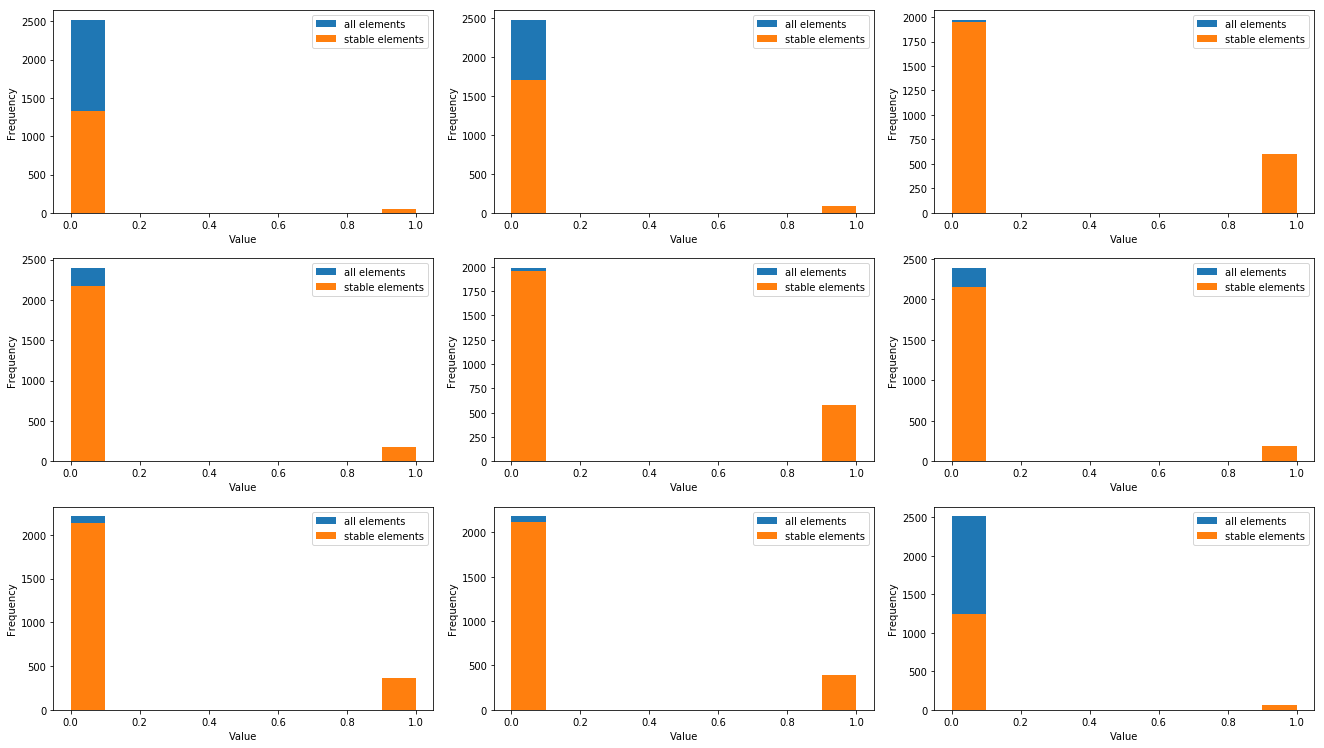

In [35]:
f,a = plt.subplots(3,3)
f.subplots_adjust(hspace=0.4, wspace=0.4)
a = a.ravel()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

for count,ax in enumerate(a):
    
    y = df_train[stab_vec_list[count]]
    print(y.value_counts())
    hist_1, bin_edges_1 = np.histogram(y)
    freq_1=hist_1/y.size
    
    ax.hist(y.values, bins=10, label='all elements')


    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    

#for count in range(9):

    #y = df_train[stab_vec_list[count]]
    stable_comp=df_train.loc[y==1,['formulaA','formulaB']]
    #print('Compound being analyzed is',stab_vec_list[count])
    stable_comp_num=stable_comp.values
    stable_A=np.unique(stable_comp_num[:,0])
    stable_B=np.unique(stable_comp_num[:,1])
    df_unique= pd.DataFrame()
    #print(df_unique.shape)

    y_unique= pd.DataFrame()
    
    for cnt in range(stable_A.shape[0]):
        #print(stable_A[cnt])
        df_tmp=y.loc[df_train['formulaA']==stable_A[cnt]]
        y_unique=pd.concat([y_unique, df_tmp],axis=0)
        #print(df_tmp.shape)
        #print(df_unique.shape)
    
    #print(y_unique.shape)

    for cnt in range(stable_B.shape[0]):
        #print(stable_A[cnt])
        df_tmp=y.loc[df_train['formulaB']==stable_B[cnt]]
        y_unique=pd.concat([y_unique, df_tmp],axis=0)

    
    y.iloc[y_unique.index.unique()]
    ax.hist(y.iloc[y_unique.index.unique()].values, bins=10, label='stable elements')
    print(y.iloc[y_unique.index.unique()].value_counts())

    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title()
    #print(stab_vec_list[count])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
    
    
    
    
    ax.legend(loc='upper right')

    


plt.tight_layout()